<a href="https://colab.research.google.com/github/inamiotko/HAR_project/blob/master/HAR_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Human Activity Recognition


This data has been released by the Wireless Sensor Data Mining
(WISDM) Lab. <http://www.cis.fordham.edu/wisdm/>

The data in this file corrispond with the data used in the
following paper:

Jennifer R. Kwapisz, Gary M. Weiss and Samuel A. Moore (2010). 
Activity Recognition using Cell Phone Accelerometers, 
Proceedings of the Fourth International Workshop on Knowledge 
Discovery from Sensor Data (at KDD-10), Washington DC. 
<http://www.cis.fordham.edu/wisdm/public_files/sensorKDD-2010.pdf>

Sampling rate: 
20Hz (1 sample every 50ms) --> every 0,05s

Fields:

*user
	nominal, 1..36

*activity
	nominal, {
		Walking
		Jogging
		Sitting
		Standing
		Upstairs
		Downstairs }

*timestamp
	numeric, generally the phone's uptime in nanoseconds
		(In future datasets this will be miliseconds
		since unix epoch.)

*x-acceleration
	numeric, floating-point values between -20 .. 20
		The acceleration in the x direction as measured
		by the android phone's accelerometer. 
		A value of 10 = 1g = 9.81 m/s^2, and
		0 = no acceleration.
		The acceleration recorded includes gravitational
		acceleration toward the center of the Earth, so
		that when the phone is at rest on a flat surface
		the vertical axis will register +-10. 

*y-accel
	numeric, see x-acceleration

*z-accel
        numeric, see x-acceleration


In [ ]:
%reset  

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import seaborn as sns
import plotly.express
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random
pd.options.mode.chained_assignment = None
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Conv1D, MaxPool1D, MaxPooling1D, GlobalAveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
columns = ['user-id', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('/content/drive/My Drive/Dataset/dataset/activityprediction/WISDM_ar_v1.1_raw.txt',
                     header=None,
                     sep=',',
                     names=columns)

#Data preprocessing



In [ ]:
print(df.head(10))

   user-id activity       timestamp    x-axis     y-axis        z-axis
0       33  Jogging  49105962326000 -0.694638  12.680544   0.50395286;
1       33  Jogging  49106062271000  5.012288  11.264028   0.95342433;
2       33  Jogging  49106112167000  4.903325  10.882658  -0.08172209;
3       33  Jogging  49106222305000 -0.612916  18.496431    3.0237172;
4       33  Jogging  49106332290000 -1.184970  12.108489     7.205164;
5       33  Jogging  49106442306000  1.375655  -2.492524    -6.510526;
6       33  Jogging  49106542312000 -0.612916  10.569390     5.706926;
7       33  Jogging  49106652389000 -0.503953  13.947236    7.0553403;
8       33  Jogging  49106762313000 -8.430995  11.413852     5.134871;
9       33  Jogging  49106872299000  0.953424   1.375655    1.6480621;


In [ ]:
df['z-axis'].replace(';','',regex=True, inplace=True)

In [ ]:
print(df.head(5))

   user-id activity       timestamp    x-axis     y-axis       z-axis
0       33  Jogging  49105962326000 -0.694638  12.680544   0.50395286
1       33  Jogging  49106062271000  5.012288  11.264028   0.95342433
2       33  Jogging  49106112167000  4.903325  10.882658  -0.08172209
3       33  Jogging  49106222305000 -0.612916  18.496431    3.0237172
4       33  Jogging  49106332290000 -1.184970  12.108489     7.205164


In [ ]:
df.dtypes

user-id        int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis        object
dtype: object

In [ ]:
df['z-axis']=df['z-axis'].astype('float64')

In [ ]:
df.isna().any()

user-id      False
activity     False
timestamp    False
x-axis       False
y-axis       False
z-axis        True
dtype: bool

In [ ]:
print(df.shape)
df=df.dropna()

(1098204, 6)


In [ ]:
df.head(600) 

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
595,33,Jogging,49183932357000,-1.076008,3.445948,8.049625
596,33,Jogging,49184042312000,-1.076008,5.216593,6.891896
597,33,Walking,49394992294000,0.844462,8.008764,2.792171
598,33,Walking,49395102310000,1.116869,8.621680,3.786457


In [ ]:
sorted_df = df.sort_values(by=['activity','user-id','timestamp'])

In [ ]:
sorted_df = sorted_df.drop(sorted_df[sorted_df['timestamp']==0].index)

In [ ]:
sorted_df[sorted_df['timestamp']==0]
labelencoder = LabelEncoder()
sorted_df['labels'] = labelencoder.fit_transform(sorted_df['activity'])

In [ ]:
pd.crosstab(sorted_df['activity'],sorted_df['user-id'])

user-id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
activity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Downstairs,2941,0,3326,1761,3281,1431,2257,3345,0,3792,2674,2870,4241,2875,1762,1575,3767,2410,2613,4673,4036,3625,1939,2929,0,3837,3442,2997,4265,3872,3892,2208,4535,2856,0,4167
Jogging,11056,11786,11018,895,6405,10961,9183,10313,0,12084,12454,12360,11301,13279,10798,0,2887,10911,16201,10728,9593,6224,12309,12278,6489,11913,10856,0,11458,0,14075,10249,2946,12869,12564,11887
Sitting,0,0,1609,1257,1664,1679,2529,2699,0,0,0,2289,1179,0,0,2984,0,1467,2534,15644,1609,0,0,690,0,0,2099,0,2319,1559,2148,3059,3248,1575,1599,2500
Standing,0,0,2824,0,1515,709,2364,3269,0,1659,0,1670,1659,0,0,1979,0,1954,2132,5389,2859,0,0,544,0,0,1630,1300,1603,3099,2612,1669,1612,1349,1069,1925
Upstairs,3120,0,3411,1377,3387,1661,3601,4453,0,4294,4392,2654,4637,8179,2055,1411,5689,2409,4280,4833,4841,5430,4836,3039,0,3618,3064,2892,4769,4226,4679,3797,2214,3921,0,5429
Walking,12861,11739,12970,6079,12257,12262,11033,17108,12923,13046,12138,10798,13047,13859,11467,12521,9677,12554,17622,13027,12498,7029,6589,6256,6979,13210,12366,14169,12354,12579,16876,12375,14898,13377,7162,6200


In [ ]:
sorted_train = sorted_df[sorted_df['user-id']<=29]
sorted_test = sorted_df[sorted_df['user-id']>29]
print(sorted_test.shape, sorted_train.shape)

(222876, 7) (862484, 7)


In [ ]:
print(sorted_df[sorted_df['activity']=='Jogging'][:-5])
print(sorted_df[sorted_df['activity']=='Downstairs'][:-5])
print(sorted_df[sorted_df['activity']=='Sitting'][:-5])
print(sorted_df[sorted_df['activity']=='Standing'][:-5])
print(sorted_df[sorted_df['activity']=='Walking'][:-5])
print(sorted_df[sorted_df['activity']=='Upstairs'][:-5])

        user-id activity       timestamp  x-axis  y-axis    z-axis  labels
948761        1  Jogging   5374662305000    4.48   14.18 -2.110000       1
948762        1  Jogging   5374712293000    3.95   12.26 -2.680000       1
948763        1  Jogging   5374762311000    6.05    9.72 -1.950000       1
948764        1  Jogging   5374812299000    5.24    7.21 -5.560000       1
948765        1  Jogging   5374862317000    7.27    5.79 -6.510000       1
...         ...      ...             ...     ...     ...       ...     ...
243290       36  Jogging  14074602308000   -1.84   14.33  3.677494       1
243291       36  Jogging  14074652204000   -5.20    6.66 -2.642348       1
243292       36  Jogging  14074702314000   -5.43   11.03  1.266692       1
243293       36  Jogging  14074752240000    1.04    7.67  1.498238       1
243294       36  Jogging  14074802259000   -0.99    7.89 -1.184970       1

[330325 rows x 7 columns]
        user-id    activity       timestamp  x-axis  y-axis    z-axis  la

In [ ]:
TIME_INTERVAL = 80
OVERLAP = 50
INPUT_DIM = 3 

In [ ]:
dict_of_activities_tr = {}
dict_of_activities_te = {}
def activity_split(dict_data, dataframe):
  for activity in dataframe.activity.unique():
    dict_data[activity] = (dataframe[dataframe['activity']==activity])

In [ ]:
activity_split(dict_of_activities_tr, sorted_train)
activity_split(dict_of_activities_te, sorted_test)

In [ ]:
def data_preprocessing(activity_df, interval, step):
  t_dataset = []
  t_labels = []
  for data in range(0, len(activity_df)-interval, step):
    x = activity_df['x-axis'].values[data: data + interval]
    y = activity_df['y-axis'].values[data: data + interval] 
    z = activity_df['z-axis'].values[data: data + interval]
  
    t_dataset.append(np.concatenate([x,y,z]))
    t_labels.append(activity_df['labels'].values[data])

  return t_dataset, t_labels

In [ ]:
def data_dividing(sorted_activity_dict):
  activity_dataset = []
  activity_labels = []
  a = sorted_activity_dict['timestamp'].to_numpy()
  b = np.insert(a, 0, 0, axis=0)
  a = np.append(a,[0])
  c=abs(a-b)
  #print(len(np.argwhere(c>500000000))) # 1000ms
  d = (np.argwhere(c>500000000))
  #print(d [:10])
  #d.shape
  d = np.squeeze(d)
  #d.shape
  #print(d[:10])

  for el in range(len(d)-1):
    t_dataset, t_labels = data_preprocessing(sorted_activity_dict.iloc[d[el]:d[el+1]], TIME_INTERVAL, OVERLAP)  
    activity_dataset.extend(t_dataset)
    activity_labels.extend(t_labels)
  return activity_dataset, activity_labels

In [ ]:
X_train = []
X_test = [] 
y_train = [] 
y_test = []

for i in dict_of_activities_te.keys():
  activity_dataset, activity_labels = data_dividing(dict_of_activities_te[i])
  X_test.extend(activity_dataset)
  y_test.extend(activity_labels)

for j in dict_of_activities_tr.keys():
  activity_dataset, activity_labels = data_dividing(dict_of_activities_tr[j])
  X_train.extend(activity_dataset)
  y_train.extend(activity_labels)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes=6)

In [ ]:
y_test = np_utils.to_categorical(y_test, num_classes=6)

In [ ]:
print(y_train[-5:])

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [ ]:
train = []
test= []

train = list(zip(X_train,y_train))
test = list(zip(X_test,y_test))

random.shuffle(train)
random.shuffle(test)

In [ ]:
train = list(map(list, zip(*train)))
test = list(map(list, zip(*test)))

X_train = np.array(train[0])
y_train = np.array(train[1])
X_test = np.array(test[0])
y_test = np.array(test[1])

In [ ]:
print(X_train[:5])

[[ 6.94561364e-01  6.88922818e-01  6.86775821e-01 ...  1.60227322e+00
   1.60648171e+00  1.59873279e+00]
 [ 1.92402865e+00  5.73997733e-01  1.68408785e+00 ...  3.06370011e+00
   8.57232284e-01  4.99617361e-02]
 [-9.75015458e-01 -1.00232040e+00 -1.18674607e+00 ... -2.83328748e-03
  -3.66199660e-01 -5.41912155e-01]
 [ 5.85243834e-01  7.85403136e-01  4.03254258e-01 ...  6.10052206e-01
   5.52667584e-01  7.84039702e-01]
 [-6.27186954e-01 -6.37681554e-01 -6.29676062e-01 ... -4.44134948e-01
  -2.40982633e-01 -2.40819514e-01]]


#First model

In [ ]:
INPUT = INPUT_DIM*TIME_INTERVAL

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape = (INPUT,), activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               24100     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

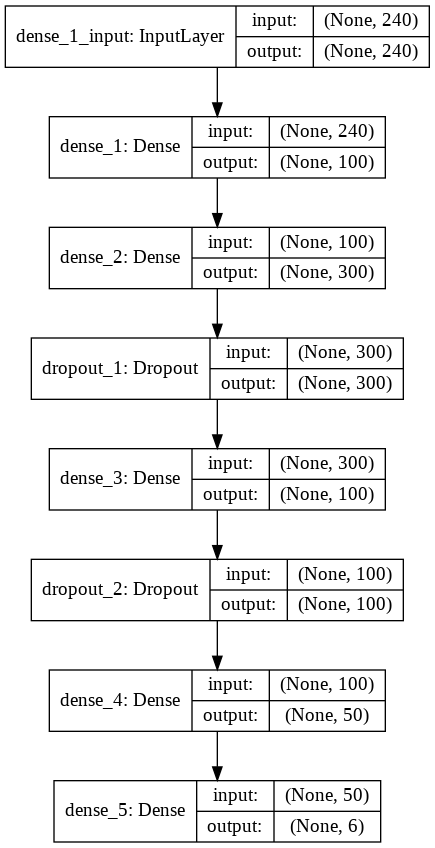

In [ ]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train,
                      y_train,
                      epochs = 50,
                      validation_split=0.2,
                      verbose=2)

In [ ]:
print(model.evaluate(X_test, y_test))

4348/4348 [==============================] - 0s 31us/step
[1.1848088626808932, 0.8332566618919373]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred[:5])

[[2.5798386e-02 2.7436073e-04 1.5434499e-06 3.4621571e-08 1.6440887e-02
  9.5748484e-01]
 [2.3566701e-03 1.4214978e-05 7.0073005e-09 8.6952182e-12 6.1378116e-05
  9.9756771e-01]
 [2.2261146e-17 2.2689721e-18 1.1058783e-37 0.0000000e+00 7.4242312e-23
  1.0000000e+00]
 [4.7009903e-06 1.7543432e-08 5.5715718e-15 2.1591091e-20 8.9828962e-09
  9.9999523e-01]
 [4.8434806e-29 7.8650264e-26 0.0000000e+00 0.0000000e+00 6.8719272e-30
  1.0000000e+00]]


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
print(y_pred[-10:])

[5 5 4 5 1 1 5 1 5 3]


In [ ]:
print(y_test[-10:])

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


In [ ]:
y_test2= np.argmax(y_test, axis=1)

In [ ]:
print(y_test2[-10:])

[5 5 4 4 1 1 5 1 5 3]


In [ ]:
print(classification_report(y_test2, y_pred)) 

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       404
           1       0.93      0.92      0.93      1269
           2       0.93      0.90      0.91       306
           3       0.96      0.92      0.94       258
           4       0.54      0.61      0.57       460
           5       0.89      0.89      0.89      1651

    accuracy                           0.83      4348
   macro avg       0.79      0.79      0.79      4348
weighted avg       0.84      0.83      0.83      4348



In [ ]:
confusion_matrix(y_test2, y_pred)
# 0-Downstairs
# 1-Jogging
# 2-Sitting
# 3-Standing
# 4-Upstairs
# 5-Walking

array([[ 197,   22,    4,    2,   88,   91],
       [  30, 1169,    0,    0,   46,   24],
       [   0,    0,  276,    0,   30,    0],
       [   2,    0,   17,  237,    2,    0],
       [  74,   34,    1,    8,  279,   64],
       [  87,   29,    0,    0,   70, 1465]])

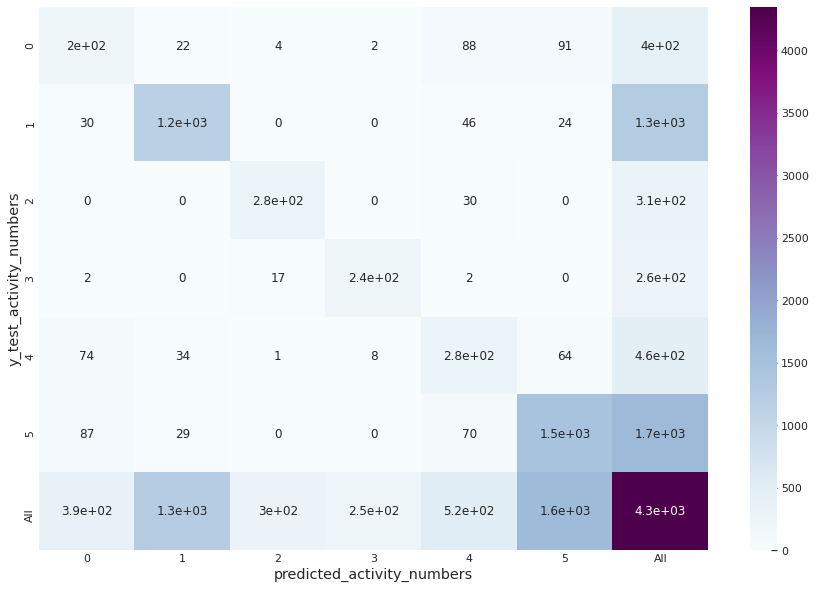

In [ ]:
plt.figure(figsize=(15,10))
confusion_matrix_df = pd.crosstab(y_test2, y_pred, rownames=['y_test_activity_numbers'], colnames=['predicted_activity_numbers'], margins = True)
sns.heatmap(confusion_matrix_df, annot=True,  cmap="BuPu")
plt.show()

#Second model

In [ ]:
model2 = Sequential()
model2.add(Reshape((TIME_INTERVAL, INPUT_DIM), input_shape=(INPUT,)))
model2.add(Conv1D(150, 10, activation='relu', input_shape=(TIME_INTERVAL, INPUT_DIM)))
model2.add(Conv1D(100, 10, activation='relu'))
model2.add(Dropout(0.5))
model2.add(MaxPooling1D(3))
model2.add(Conv1D(160, 10, activation='relu'))
model2.add(Conv1D(80, 10, activation='relu'))
model2.add(Dropout(0.5))
model2.add(GlobalAveragePooling1D())
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(6, activation='softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

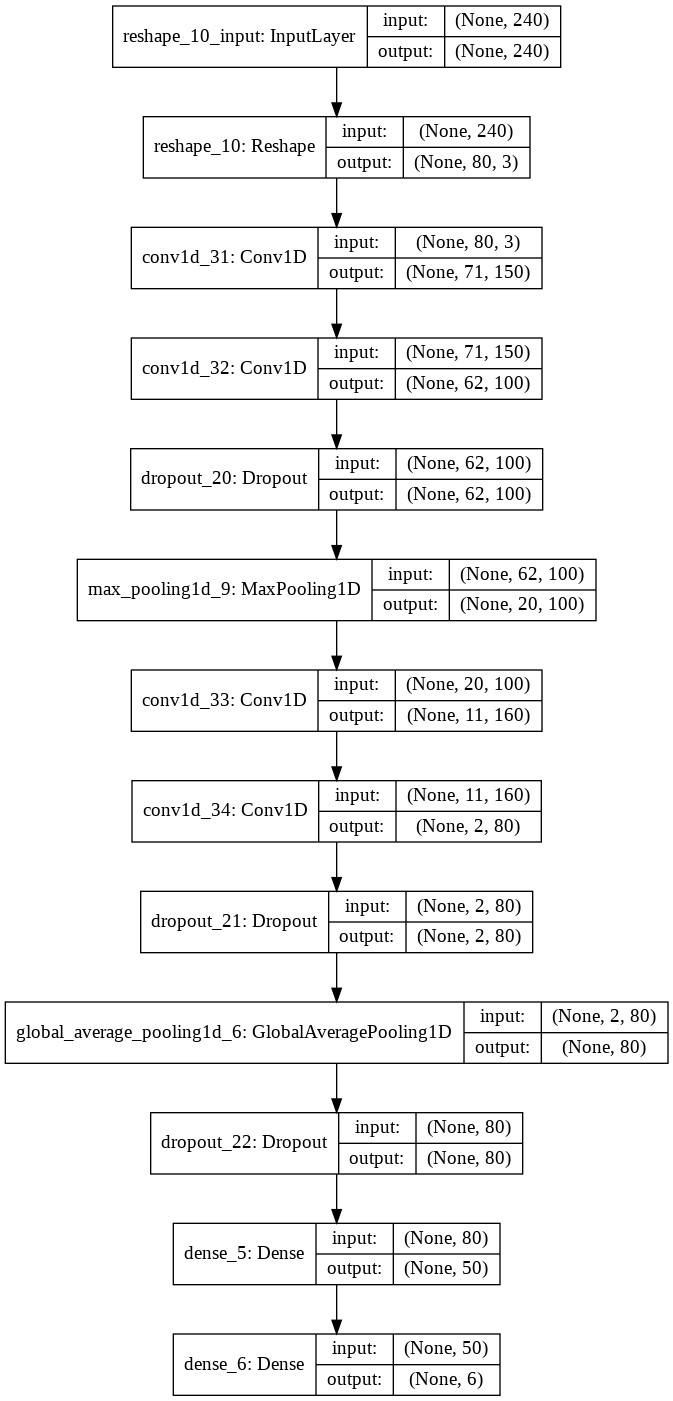

In [ ]:
keras.utils.plot_model(model2, to_file='model2_plot2.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model2.fit(X_train,
                      y_train,
                      batch_size = 128,
                      epochs = 15,
                      validation_split=0.2,
                      verbose=1)

Train on 13444 samples, validate on 3362 samples
Epoch 1/15
13444/13444 [==============================] - 2s 171us/step - loss: 0.8483 - accuracy: 0.6942 - val_loss: 0.5447 - val_accuracy: 0.7915
Epoch 2/15
13444/13444 [==============================] - 2s 134us/step - loss: 0.5314 - accuracy: 0.7986 - val_loss: 0.3548 - val_accuracy: 0.8608
Epoch 3/15
13444/13444 [==============================] - 2s 136us/step - loss: 0.3921 - accuracy: 0.8471 - val_loss: 0.3101 - val_accuracy: 0.8894
Epoch 4/15
13444/13444 [==============================] - 2s 144us/step - loss: 0.3126 - accuracy: 0.8806 - val_loss: 0.2359 - val_accuracy: 0.9212
Epoch 5/15
13444/13444 [==============================] - 2s 132us/step - loss: 0.2814 - accuracy: 0.9012 - val_loss: 0.1852 - val_accuracy: 0.9414
Epoch 6/15
13444/13444 [==============================] - 2s 136us/step - loss: 0.2062 - accuracy: 0.9296 - val_loss: 0.2334 - val_accuracy: 0.9280
Epoch 7/15
13444/13444 [==============================] - 2s 13

In [ ]:
model2.evaluate(X_test, y_test)

4348/4348 [==============================] - 1s 129us/step


[0.5001005135003646, 0.8953542113304138]

In [ ]:
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[:5])

[1 0 5 0 0]


In [ ]:
y_test2= np.argmax(y_test, axis=1)
print(y_test2[:5])

[1 0 5 0 0]


In [ ]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       404
           1       0.99      0.92      0.95      1269
           2       0.74      0.90      0.81       306
           3       0.99      0.58      0.73       258
           4       0.72      0.75      0.73       460
           5       0.94      0.98      0.96      1651

    accuracy                           0.90      4348
   macro avg       0.86      0.83      0.83      4348
weighted avg       0.90      0.90      0.90      4348



In [ ]:
confusion_matrix(y_test2, y_pred)
# 0-Downstairs
# 1-Jogging
# 2-Sitting
# 3-Standing
# 4-Upstairs
# 5-Walking

array([[ 349,    0,    0,    0,   35,   20],
       [  11, 1165,    0,    0,   57,   36],
       [   0,    0,  276,    0,   30,    0],
       [   3,    0,   97,  150,    8,    0],
       [  64,    7,    1,    1,  343,   44],
       [  38,    0,    0,    0,    3, 1610]])

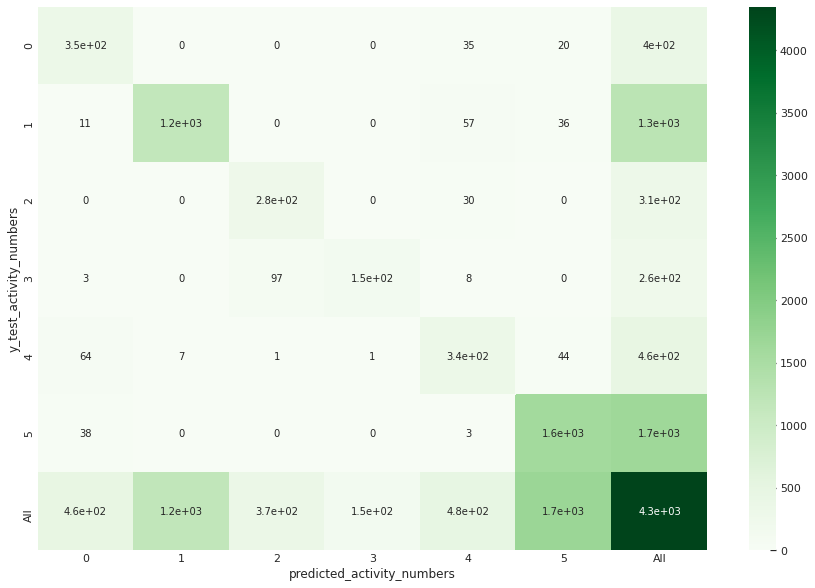

In [ ]:
plt.figure(figsize=(15,10))
confusion_matrix_df = pd.crosstab(y_test2, y_pred, rownames=['y_test_activity_numbers'], colnames=['predicted_activity_numbers'], margins = True)
sns.heatmap(confusion_matrix_df, annot=True,  cmap="Greens")
plt.show()

#Data representation

#WISDM Dataset
Fields:

*user
	nominal, 1..36

*activity
	nominal, {
		Walking
		Jogging
		Sitting
		Standing
		Upstairs
		Downstairs }

*timestamp
	numeric, generally the phone's uptime in nanoseconds
		(In future datasets this will be miliseconds
		since unix epoch.)

*x-acceleration
	numeric, floating-point values between -20 .. 20
		The acceleration in the x direction as measured
		by the android phone's accelerometer. 
		A value of 10 = 1g = 9.81 m/s^2, and
		0 = no acceleration.
		The acceleration recorded includes gravitational
		acceleration toward the center of the Earth, so
		that when the phone is at rest on a flat surface
		the vertical axis will register +-10. 

*y-accel
	numeric, see x-acceleration

*z-accel
        numeric, see x-acceleration


In [ ]:
sns.set()

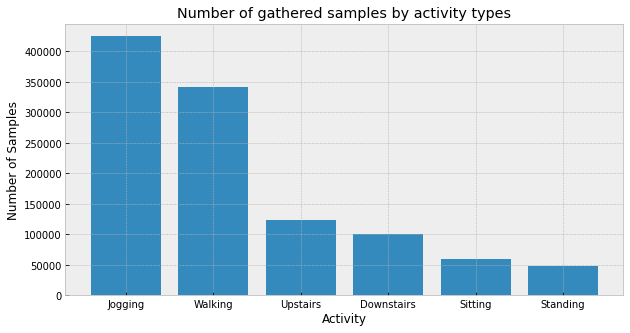

In [ ]:
plt.figure(figsize= (10,5))
plt.style.use('bmh')
plt.bar(df.activity.unique(),df['activity'].value_counts())
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.title('Number of gathered samples by activity types')
plt.show()

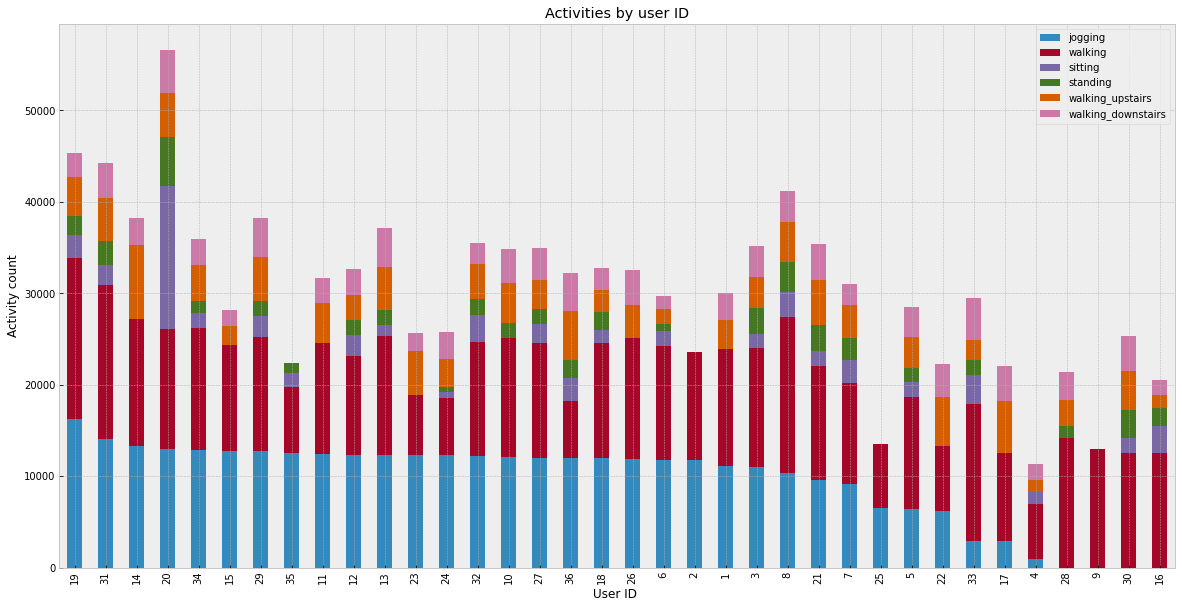

In [ ]:
jog = df[df['activity']=='Jogging']
walk = df[df['activity']=='Walking']
down = df[df['activity']=='Downstairs']
up = df[df['activity']=='Upstairs']
sit = df[df['activity']=='Sitting']
stand = df[df['activity']=='Standing']

A = jog['user-id'].value_counts()
B = walk['user-id'].value_counts()
C = sit['user-id'].value_counts()
D= stand['user-id'].value_counts()
E= up['user-id'].value_counts()
F = down['user-id'].value_counts()

A = dict(A)
B = dict(B)
C = dict(C)
D = dict(D)
E = dict(E)
F = dict(F)

all = dict(jogging = A, walking = B, sitting = C, standing = D, walking_upstairs = E,  walking_downstairs = F)

graph = pd.DataFrame(all)
graph.plot(figsize = (20,10), kind='bar', stacked=True, use_index=True)
plt.title('Activities by user ID')
plt.xlabel('User ID ')
plt.ylabel('Activity count')
plt.show()

In [ ]:
def data_rep(time):
  n_samples= time*20 #20Hz sampling rate
  return n_samples

Text(0.5, 1.0, 'Jogging x')

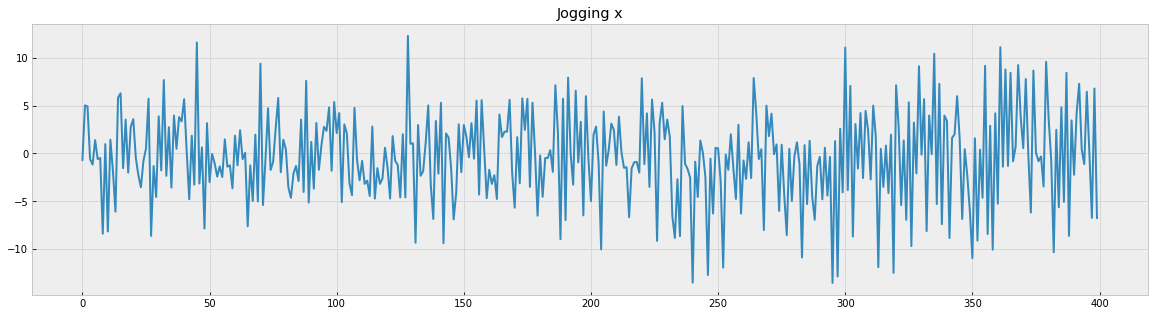

In [ ]:
n_samples=data_rep(20)
plt.figure(figsize=(20,5))
plt.plot(jog['x-axis'][:n_samples])
plt.title('Jogging x')

Text(0.5, 1.0, 'Jogging y')

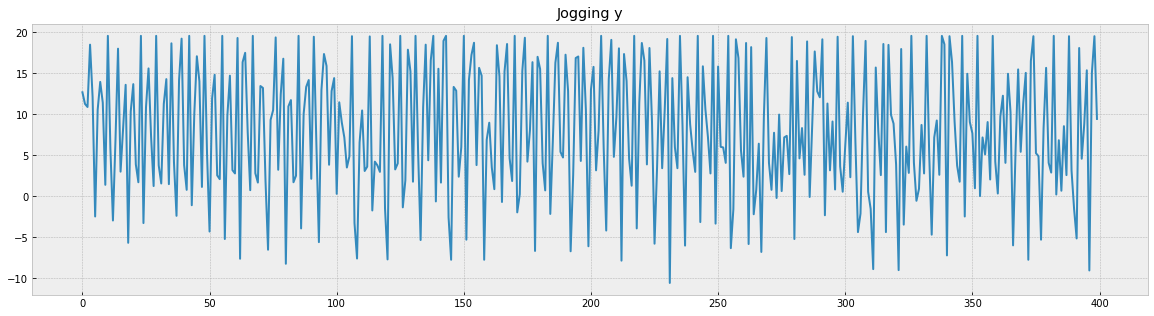

In [ ]:
n_samples=data_rep(20)
plt.figure(figsize=(20,5))
plt.plot(jog['y-axis'][:n_samples])
plt.title('Jogging y')

Text(0.5, 1.0, 'Jogging z')

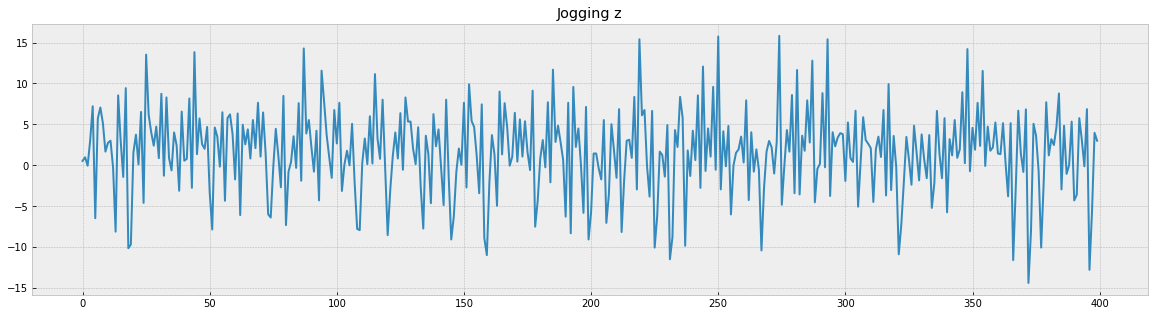

In [ ]:
n_samples=data_rep(20)
plt.figure(figsize=(20,5))
plt.plot(jog['z-axis'][:n_samples])
plt.title('Jogging z')

Text(0.5, 1.0, 'Jogging')

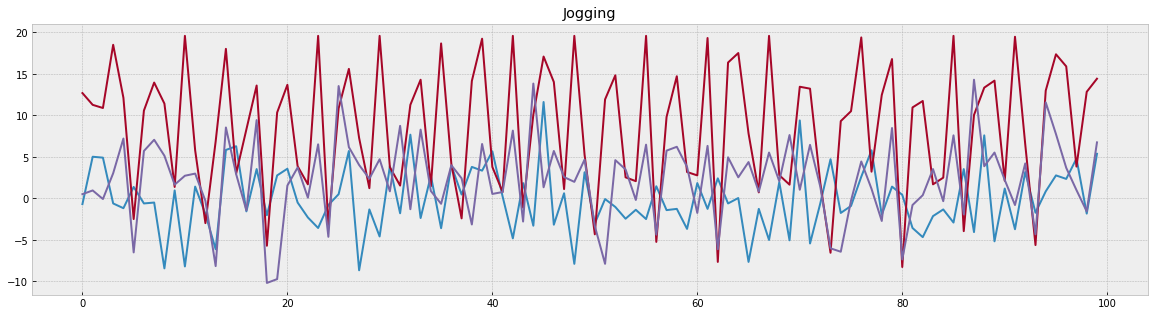

In [ ]:
n_samples=data_rep(5) #5 seconds
plt.figure(figsize=(20,5))
plt.plot(jog['x-axis'][:n_samples])
plt.plot(jog['y-axis'][:n_samples])
plt.plot(jog['z-axis'][:n_samples])
plt.title('Jogging')

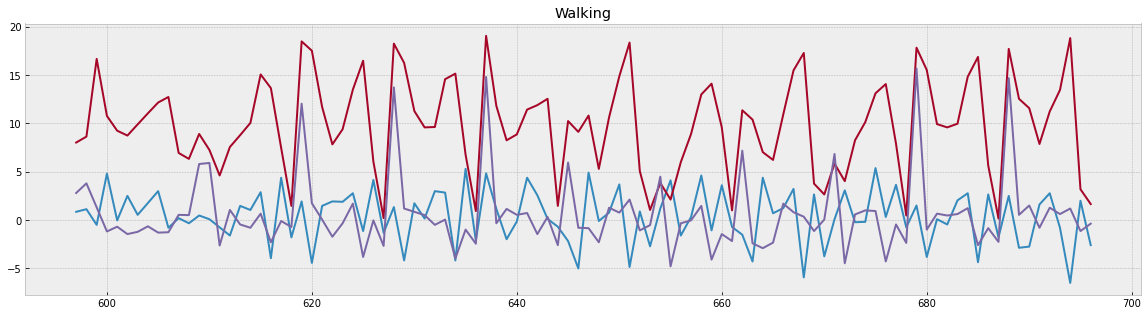

In [ ]:
n_samples=data_rep(5) #5 seconds
plt.figure(figsize=(20,5))
plt.plot(walk['x-axis'][:n_samples])
plt.plot(walk['y-axis'][:n_samples])
plt.plot(walk['z-axis'][:n_samples])
plt.title('Walking')


Text(0.5, 1.0, 'Standing')

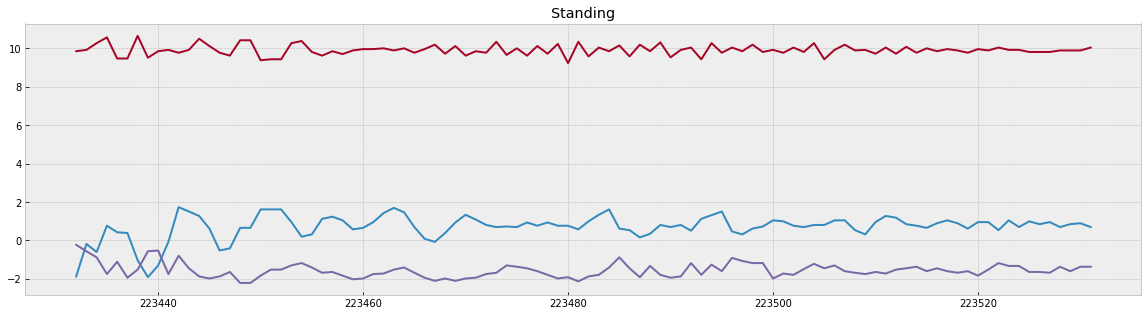

In [ ]:
n_samples=data_rep(5) #5 seconds
plt.figure(figsize=(20,5))
plt.plot(stand['x-axis'][:n_samples])
plt.plot(stand['y-axis'][:n_samples])
plt.plot(stand['z-axis'][:n_samples])
plt.title('Standing')

Text(0.5, 1.0, 'Sitting')

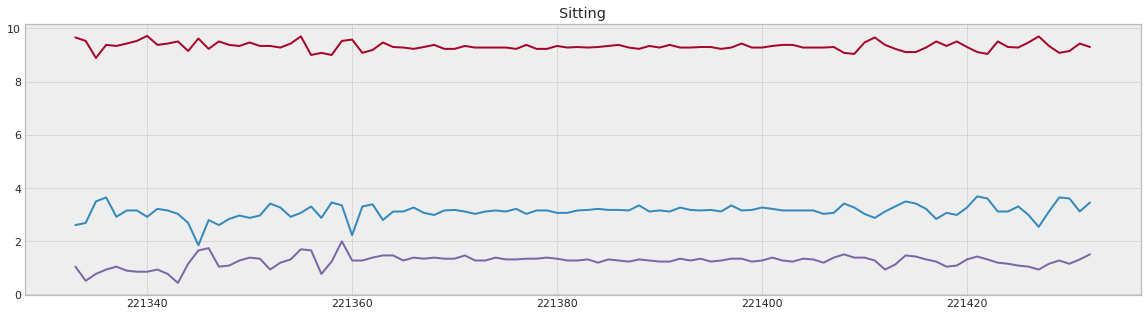

In [ ]:
n_samples=data_rep(5) #5 seconds
plt.figure(figsize=(20,5))
plt.plot(sit['x-axis'][:n_samples])
plt.plot(sit['y-axis'][:n_samples])
plt.plot(sit['z-axis'][:n_samples])
plt.title('Sitting')

#NHANES Dataset



PAXSTAT: Component status code with PAXSTAT=1 for records with data that are deemed reliable. A PAXSTAT=2 was used to code records that had some questionable data; analysts may wish to examine these records more closely.

PAXDAY: Day of the week; PAXDAY=1 for Sunday, 2 for Monday and so forth.

PAXN: Sequential observation number in minutes as recorded by the monitor device. The range begins with minute 1 on Day 1 (PAXN=1) and ends with the last minute of day 7 of monitor wear (PAXN=10080). Each day of wear produces 1440 individual minute records. The PAXN values for Day 1 range from 1 to 1440; Day 2 PAXN range from 1441-2880, and so forth.

PAXHOUR-hour of day the intensity data were recorded in military time or 24 hour clock.

PAXMINUT- minute value associated with a particular hour (PAXHOUR). The minute value shown is the start of the minute. For example, for the time 1201 hours, the start of the minute occurs at 1200 hours and PAXMINUT would be 00.

PAXINTEN is the intensity value recorded by the device. Each minute has an intensity value.

PAXCAL- Denotes whether the monitor was in calibration when it was returned by the subject. The data for monitors that were out of calibration (PMACAL=2) may be less reliable.

In [ ]:
df_c = pd.read_sas("drive/My Drive/Dataset/dataset/paxraw_c.xpt", format='xport')

In [ ]:
day_df = df_c[:1440]
week_df = df_c[10080:20160]
three_df = df_c[:4320]
month_df = df_c[40320:80640]
three_month_df = df_c[:120960]
year_df = df_c[:525600]

In [ ]:
three_month_df_reshaped = np.reshape(three_month_df['PAXINTEN'].to_numpy(), (1440,-1))
morning = three_month_df_reshaped[600:615,:]
noon = three_month_df_reshaped[720:735,:]
afternoon = three_month_df_reshaped[840:855,:]
evening = three_month_df_reshaped[1020:1035,:]
day = np.concatenate((morning, noon, afternoon, evening), axis=0)

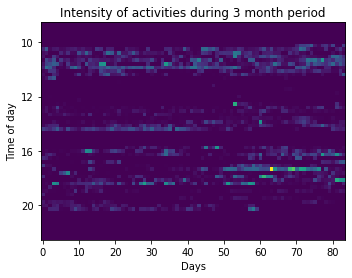

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(day)
h=[10,12,16,20]
ax.set_yticks([5,20,35,50])
ax.set_yticklabels(h)
ax.set_xlabel('Days')
ax.set_ylabel('Time of day')
ax.set_title('Intensity of activities during 3 month period')
plt.savefig('img.png')

In [79]:
import json

In [80]:
with open('/steps-2020-08-21.json') as f:
  data = json.load(f)

In [81]:
df = pd.DataFrame.from_dict(data)
print(df[:5])

            dateTime value
0  08/22/20 11:31:00     0
1  08/22/20 11:32:00     0
2  08/22/20 11:33:00    20
3  08/22/20 11:34:00    32
4  08/22/20 11:35:00    35


In [82]:
df['dateTime'].dtypes

dtype('O')

In [83]:
df[['date','time']] = df["dateTime"].str.split(" ", 1, expand=True)

In [84]:
df['date'].unique()

array(['08/22/20', '08/23/20', '08/24/20', '08/25/20', '08/26/20',
       '08/27/20', '08/28/20', '08/29/20', '08/30/20', '08/31/20',
       '09/01/20'], dtype=object)

In [85]:
df['day_number']=df.groupby('date').ngroup()

In [86]:
df['time'].astype(str)

0       11:31:00
1       11:32:00
2       11:33:00
3       11:34:00
4       11:35:00
          ...   
5067    07:54:00
5068    08:03:00
5069    08:04:00
5070    08:05:00
5071    08:10:00
Name: time, Length: 5072, dtype: object

In [87]:
df[['hours','minutes']] = df["time"].str.split(":", 1, expand=True)

In [88]:
df['minutes'].replace(':00','',regex=True,inplace=True)

In [89]:
df['hours']=df['hours'].astype(int)
df['minutes']=df['minutes'].astype(int)


In [90]:
df['oneday_time_mins']=df['hours']*60 + df['minutes']

In [91]:
df['overall_time_mins']=df['day_number']*24*60 + df['hours']*60 + df['minutes']

In [93]:
df

,dateTime,value,date,time,day_number,hours,minutes,oneday_time_mins,overall_time_mins
0,08/22/20 11:31:00,0,08/22/20,11:31:00,0,11,31,691,691
1,08/22/20 11:32:00,0,08/22/20,11:32:00,0,11,32,692,692
2,08/22/20 11:33:00,20,08/22/20,11:33:00,0,11,33,693,693
3,08/22/20 11:34:00,32,08/22/20,11:34:00,0,11,34,694,694
4,08/22/20 11:35:00,35,08/22/20,11:35:00,0,11,35,695,695
...,...,...,...,...,...,...,...,...,...
5067,09/01/20 07:54:00,0,09/01/20,07:54:00,10,7,54,474,14874
5068,09/01/20 08:03:00,44,09/01/20,08:03:00,10,8,3,483,14883
5069,09/01/20 08:04:00,14,09/01/20,08:04:00,10,8,4,484,14884
5070,09/01/20 08:05:00,0,09/01/20,08:05:00,10,8,5,485,14885


In [94]:
data = df.drop(["hours","minutes","dateTime"], axis=1)

In [95]:
data

,value,date,time,day_number,oneday_time_mins,overall_time_mins
0,0,08/22/20,11:31:00,0,691,691
1,0,08/22/20,11:32:00,0,692,692
2,20,08/22/20,11:33:00,0,693,693
3,32,08/22/20,11:34:00,0,694,694
4,35,08/22/20,11:35:00,0,695,695
...,...,...,...,...,...,...
5067,0,09/01/20,07:54:00,10,474,14874
5068,44,09/01/20,08:03:00,10,483,14883
5069,14,09/01/20,08:04:00,10,484,14884
5070,0,09/01/20,08:05:00,10,485,14885
